In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_regression, make_classification
from sklearn.utils import shuffle

# Newton Raphson Method

**<font color='blue'> 1.a. Write a python function that returns the value of $f(x)=x^3-2x-5$.<br>1.b. Write a python function that returns the value of the derivative of $f(x)$.**

**<font color='blue'> 2.a. Display the graph of $f(x)=x^3-2x-5$ between x = -5 and x = 5.<br>2.b. Graphically, what could be the solution of $f(x)=0$ ?**

The Newton-Raphson method is a powerful and widely used tool for finding roots of real-valued functions.<br> It is an iterative approach, meaning it starts with an initial guess and refines this guess through repeated iterations.<br><br>

<center><font size=5>
$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$<br>

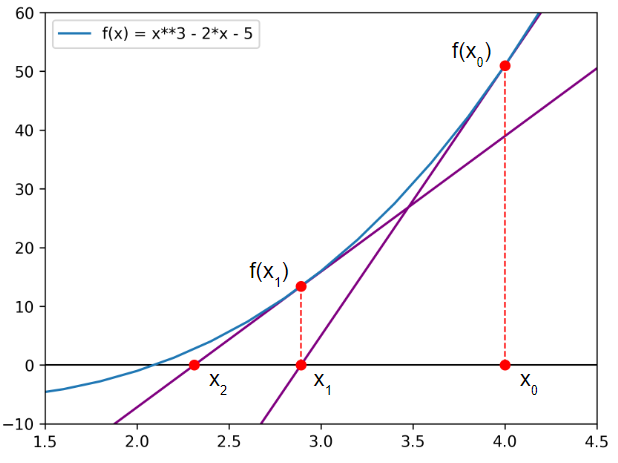 </center>

**<font color='blue'> 3. Write a function that computes the Newton Raphson formula.**

**<font color='blue'> 4. Write a function that takes an initial guess of x0 and iteratively updates it until $f(x) \approx 0$.<br> Count the number of iterations.**

*Tips: You can iterate until $f(x) < \epsilon$ with ϵ a value close to 0.*

**<font color='blue'> 5.a. What is the final value of x for $f(x) = 0$ ?<br>5.b. Add this value on the graph.<br>5.c. Try other initial guesses, what happens ?**

# Newton's Method

In [ ]:
n_f = 5
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=0.5,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i}' for i in range(1,n_f+1)]+['y'])
df.head()

,X_1,X_2,X_3,X_4,X_5,y
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.738571
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-42.051796
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.700748
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-86.950690
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.012064


In order to compute the **Newton's method** we need to choose:


*   A method to predict the values
*   A cost function to estimate the errors made by the prediction


The method used to predict the values is the **multivariate linear regression** with 5 features:<br><br>

<font size="+1"><center>$\begin{align*}y_{pred} &= \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_0\\
&= X \cdot \Theta^T+\theta_0
\end{align*}$</center><br>

with $X \cdot \Theta^T$ the dot product of the following matrices:

<font size="+1"><center>$\begin{align*}
\Theta^T &= \begin{bmatrix} \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\\ \theta_5 \\
\end{bmatrix}\\
X &= \begin{bmatrix}x_{0,1} & x_{0,2} & x_{0,3} & x_{0,4} & x_{0,5}\\
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} & x_{1,5}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{m,1} & x_{m,2} & x_{m,3} & x_{m,4} & x_{m,5}\\
\end{bmatrix}
\end{align*}$</center><br>

The **cost function** used in this example is the **mean squared error**. <br>
It is a convex, defined and derivable function which is perfect for the Gradient Descent method.<br>
It can be expressed using the following formula:<br><br>

<font size="+1"><center>$J(\Theta) = \frac {1}{m} \sum_{i=1}^{m}(y_{pred,i}-y_{true,i})^2$</center><br>

We can inject the linear regression into the cost function in order to get:<br><br>

<font size="+1"><center>$J(\Theta)=\frac {1}{m} \sum_{i=1}^{m}((X_i \cdot \Theta^T+\theta_0) - y_{true,i})^2$</center><br>

with $m$ the number of instances in the dataset, <br> $\Theta$ and $\theta_{0}$ the parameter of the model, <br>$y_{true,i}$ the label of the i-th instance, <br> $X_{i}$ the features of the i-th instance.<br><br>

Here is the **Gradient** for the multivariate linear regression:<br><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac{\partial J(\theta)}{\partial\theta_0}\\
\frac{\partial J(\theta)}{\partial\theta_1}\\
\vdots\\
\frac{\partial J(\theta)}{\partial\theta_5}
\end{bmatrix}$</center><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)}\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,1}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})\\
\vdots\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,5}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})
\end{bmatrix}$</center><br>

Here is the **Hessian** for the multivariate linear regression with 5 features:<br><br>

<font size="+1"><center>$H(J)(\Theta) = \begin{bmatrix}
\frac{\partial^2 J(\Theta)}{\partial \theta_0^2} & \frac{\partial^2 J(\Theta)}{\partial \theta_0 \partial \theta_1} &\cdots & \frac{\partial^2 J(\Theta)}{\partial \theta_0 \partial \theta_5} \\
\frac{\partial^2 J(\Theta)}{\partial \theta_1 \partial \theta_0} & \frac{\partial^2 J(\Theta)}{\partial \theta_1^2} &\cdots & \frac{\partial^2 J(\Theta)}{\partial \theta_1 \partial \theta_5} \\
\vdots & \vdots &\ddots & \vdots \\
\frac{\partial^2 J(\Theta)}{\partial \theta_5 \partial \theta_0} & \frac{\partial^2 J(\Theta)}{\partial \theta_5 \partial \theta_1} &\cdots & \frac{\partial^2 J(\Theta)}{\partial \theta_5^2}
\end{bmatrix}$</center><br>

Which gives:

<font size="+1"><center>$H(J)(\Theta) = \begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m} 1 & \frac {2}{m} \sum_{i=1}^{m} x_{i,1} &\cdots & \frac {2}{m} \sum_{i=1}^{m} x_{i,5} \\
\frac {2}{m} \sum_{i=1}^{m} x_{i,1} & \frac {2}{m} \sum_{i=1}^{m} x_{i,1}^2 &\cdots & \frac {2}{m} \sum_{i=1}^{m} x_{i,1}x_{i,5} \\
\vdots & \vdots & \ddots & \vdots \\
\frac {2}{m} \sum_{i=1}^{m} x_{i,5} & \frac {2}{m} \sum_{i=1}^{m} x_{i,5}x_{i, 1} & \cdots & \frac {2}{m} \sum_{i=1}^{m} x_{i,5}^2
\end{bmatrix}$</center><br>

The first row and column of the Hessian matrix are related to the bias and behave differently than the rest of the matrix.<br>Indeed, $\frac{\partial^2 J(\Theta)}{\partial \theta_0^2}$ is $\frac{\partial\left (\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)} \right)}{\partial \theta_0}$ which is linear relative to $\theta_0$ and gives $\frac {2}{m} \sum_{i=1}^{m} 1$.<br>
Similarly, $\frac{\partial^2 J(\Theta)}{\partial \theta_0 \partial \theta_1}$ is $\frac{\partial\left (\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)} \right)}{\partial \theta_1}$ which gives $\frac {2}{m} \sum_{i=1}^{m}x_{i,1}$<br>

Some thoughts about the bias.<br>

> *In the case of linear regression, the Hessian matrix is usually not used for updating the bias term because the bias term is a scalar value added to the weighted sum of the features and its impact on the loss function is linear. Therefore, its gradient is straightforward to calculate and usually does not require the second-order derivative information that the Hessian provides.*

Now, we can use the Newton's Method to iteratively update the weights using the following formula:<br><br>

<font size="+1"><center>$\Theta_{n+1} = \Theta_{n} - H(J)(\Theta_{n})^{-1}\cdot\bigtriangledown J(\Theta_{n})$</center><br>


**<font color="blue"> 1.a. Create a new column in X full of 1. This column represents the bias column.<br>1.b. Initialize the parameters of the model to 0.<br>1.c. Check the shapes.**

*Tips: Create a numpy array W that contains all the parameters of the features and the bias.<br> The shape of W should be (6,).*

**<font color="blue"> 2.a. Create a predict function for the multivariate linear regression.
<br>2.b. Check the shape of the prediction, it should be (1000,).
<br>2.c. Create a function that computes the mean squared error.**

*Tips: The predict function should now takes the new X and W as input since the bias is included in W.*

**<font color="blue"> 3.a. Create a gradient function that computes the gradient vector of the multivariate linear regression.
<br>3.b. Check the shape of the gradient. It should be (6,).**

*Tips: Be careful of the shapes of X (1000, 6) and the error measurement (1000,).<br> There is one error per instance of the dataset (i.e. per line) but there are 5 features plus the bias.<br> Each feature - and the bias column - have to be multipied by the error.*

**<font color="blue"> 4.a. Create a hessian function that computes the Hessian matrix of the multivariate linear regression and returns its inverse.
<br>4.b. Check the shape of the inverse of the Hessian matrix. It should be (6,6).**

*Tips: You can use the `np.linalg.inv(arr)` function from the numpy library.*

**<font color="blue"> 5. Create an update_weights function that computes one step of the Newton's method with the Gradient and the inverse of the Hessian matrix and returns the updated weights.**

**<font color="blue">6.a. Create a main function that runs multiple Newton's method step and stops:**

*   <font color="blue">**After a maximum number of iterations is reached;**
*   <font color="blue">**If the loss function improvement between two steps is small enough.**

**<font color="blue">6.b. Display the evolution of the loss function values on a graph.**

# BFGS - Quasi Newton Method

In [ ]:
n_f = 5
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=0.5,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i}' for i in range(1,n_f+1)]+['y'])
df.head()

,X_1,X_2,X_3,X_4,X_5,y
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.738571
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-42.051796
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.700748
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-86.950690
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.012064


In order to compute the **Newton's method** we need to choose:


*   A method to predict the values
*   A cost function to estimate the errors made by the prediction


The method used to predict the values is the **multivariate linear regression** with 5 features:<br><br>

<font size="+1"><center>$\begin{align*}y_{pred} &= \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_0\\
&= X \cdot \Theta^T+\theta_0
\end{align*}$</center><br>

with $X \cdot \Theta^T$ the dot product of the following matrices:

<font size="+1"><center>$\begin{align*}
\Theta^T &= \begin{bmatrix} \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\\ \theta_5 \\
\end{bmatrix}\\
X &= \begin{bmatrix}x_{0,1} & x_{0,2} & x_{0,3} & x_{0,4} & x_{0,5}\\
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} & x_{1,5}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{m,1} & x_{m,2} & x_{m,3} & x_{m,4} & x_{m,5}\\
\end{bmatrix}
\end{align*}$</center><br>

The **cost function** used in this example is the **mean squared error**.<br>
It can be expressed using the following formula:<br><br>

<font size="+1"><center>$J(\Theta) = \frac {1}{m} \sum_{i=1}^{m}(y_{pred,i}-y_{true,i})^2$</center><br>

We can inject the linear regression into the cost function in order to get:<br><br>

<font size="+1"><center>$J(\Theta)=\frac {1}{m} \sum_{i=1}^{m}((X_i \cdot \Theta^T+\theta_0) - y_{true,i})^2$</center><br>

with $m$ the number of instances in the dataset, <br> $\Theta$ and $\theta_{0}$ the parameter of the model, <br>$y_{true,i}$ the label of the i-th instance, <br> $X_{i}$ the features of the i-th instance.<br><br>

Here is the **Gradient** for the multivariate linear regression:<br><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac{\partial J(\theta)}{\partial\theta_0}\\
\frac{\partial J(\theta)}{\partial\theta_1}\\
\vdots\\
\frac{\partial J(\theta)}{\partial\theta_5}
\end{bmatrix}$</center><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)}\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,1}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})\\
\vdots\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,5}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})
\end{bmatrix}$</center><br>

The BFGS algorithm is a quasi-newton method and uses an approximation of the Hessian matrix instead of computing it.<br> Here is the formula:

<font size="+1"><center>$H_{n+1} = H_n + \left( I - \frac{s_ny_n^T}{y_n^Ts_n} \right)H_n\left(I - \frac{y_ns_n^T}{y_n^Ts_n}\right) + \frac{s_ns_n^T}{y_n^Ts_n}$</center><br>

with <font size="+1"><center>$\begin{align*}s_n &= \Theta_{n+1} - \Theta_{n} \\ y_n &= \bigtriangledown J(\Theta_{n+1}) - \bigtriangledown J(\Theta_{n})\end{align*}$</center><br>

**<font color="blue"> 1. Create a mean squared error function that takes X, Y and W as inputs, computes the prediction and then the mean squared error.**

**<font color="blue"> 2. Create function that takes X, Y and W as inputs adn computes the gradient.**

**<font color="blue"> 3. Create a function that takes the previous approximation of the Hessian matrix, $s_n$ and $y_n$ and returns the next approximation.**

The BFGS algorithm updates the weights using the following formula:

<font size="+1"><center>$\begin{align*}p_n &= - H_n\bigtriangledown L(\Theta_n) \\ \Theta_{n+1} &= \Theta_n + \alpha_n p_n \end{align*}$</center><br>

We can find the alpha parameter using the Wolfe conditions:

<font size="+1"><center>$\tag{Armijo Condition} L(\Theta + \alpha p) \leq L(\Theta)+c_1\alpha\bigtriangledown L(\Theta)^Tp$</center>

<font size="+1"><center>$\tag{Curvature Condition} \bigtriangledown L(\Theta + \alpha p)^Tp \geq c_2 \bigtriangledown L(\Theta)^Tp  $</center><br>

**<font color="blue"> 4. Create a function that takes X, Y, W, p, d_w (the gradient), $c_1$ and $c_2$, searches for the alpha parameter using the Wolfe conditions (Armijo and Curvature) and return the updated weights when the correct alpha is found. The function should start with alpha = 1.0 and updates it by dividing it by 2 until the two conditions are True.**

*Tips: Remember, $p_n = - H_n\bigtriangledown L(\Theta_n)$ and $\Theta_{n+1} = \Theta_n + \alpha_n p_n$.<br> Additionally,  $c_1$ should be between 0 and 1. $c_2$ should be between 0.9 and 1.*


**<font color="blue"> 5. Create a main function that: <br>**

*   **<font color="blue">Computes the gradient.**
*   **Computes $p_n$.**
*   **Updates the weight using the previous function.**
*   **Computes $s_n$ and $y_n$.**
*   **Updates the approximation of the hessian matrix.**

*Tips: Don't forget to stop when the algorithm doesn't improve the loss anymore.*



# L-BFGS

In [ ]:
n_f = 5
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=0.5,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i}' for i in range(1,n_f+1)]+['y'])
df.head()

,X_1,X_2,X_3,X_4,X_5,y
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.738571
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-42.051796
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.700748
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-86.950690
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.012064


**<font color="blue"> 1. Create the following functions:**

*   <font color="blue">**One that computes the MSE,**
*   **One that computes the gradient,**
*   **One that updates the approximation of the inverse of the Hessian matrix,**
*   **One that searches the step of the BFGS algorithm and updates the weights.**

*Tips: You can reuse the functions from question 1, 2, 3 and 4 of the BFGS exercise.*

The two-recursion algorithm is approximating the inverse of the hessian matrix using a three step method:

**Backward pass**

> Starting from the current gradient, the algorithm iterates backwards through the history of stored $s_n$ and $y_n$ vectors. For each pair of $s_n$ and $y_n$, it calculates a scaling factor $\alpha_n$ and modifies the gradient by subtracting a portion of the corresponding $y_n$ vector, scaled by $\alpha_n$. This process incorporates curvature information from recent iterations into the gradient. For each iteration i going backwards from the most recent to the oldest (up to $m$ iterations back), the algorithm computes:

<font size="+1"><center>$\begin{align*}\alpha_i &= \frac{s_i^T q}{y_i^T s_i} \\ q &= q - \alpha_i y_i\end{align*}$</center><br>

**Scaling Step**

> The algorithm calculates a scaling factor $\gamma_k$ based on the most recent $s_n$ and $y_n$ vectors. The vector from the backward pass is then scaled by this factor.

<font size="+1"><center>$\begin{align*}\gamma_n &= \frac{s_{n-1}^T y_{n-1}}{y_{n-1}^T y_{n-1}} \\ p &= -\gamma_n q\end{align*}$</center><br>

**Forward pass**

> For each $s_n$ and $y_n$ pair, the algorithm calculates a new scaling factor $\beta$ and adjusts the current vector by adding a portion of the corresponding $s_n$ vector, corrected by the previously computed $\alpha$ values from the backward pass. For each iteration i going forward, the algorithm computes:

<font size="+1"><center>$\begin{align*}\beta &= \frac{y_i^T r}{y_i^T s_i} \\ r &= r + s_i(\alpha_i - \beta)\end{align*}$</center><br>

**<font color="blue"> 2. Create a function for the Two-Recursion algorithm that takes the current gradient, the lists of the $s_n$ and $y_n$ values, the current iteration number and m - the parameter that defines how many previous values the algorithm should take into account.**

**<font color="blue"> 3. Create the main function that runs the L-BFGS algorithm.**

*Tips: The function is the same as for the BFGS algorithm but p takes the output of the two-recursion algorithm from the previous function.*